In [32]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [33]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [34]:
#add the latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [35]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [36]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [37]:
#import the requests library
import requests
from datetime import datetime

#import the API key
from config import weather_api_key


In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9041442e75187dcd0e9d0ed855e8f9f4


In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    #log the uRL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #Add 1 to the record count
    record_count+=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = city_weather["dt"]
        
        # Append the city information into city_data list.
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | wagar
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | pandan
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | raudeberg
Processing Record 10 of Set 1 | ventspils
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | neiafu
Processing Record 15 of Set 1 | zaltan
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | bayonet point
Processing Record 21 of Set 1 | atuo

Processing Record 37 of Set 4 | nowy dwor mazowiecki
Processing Record 38 of Set 4 | saint-joseph
Processing Record 39 of Set 4 | kalengwa
Processing Record 40 of Set 4 | jalu
Processing Record 41 of Set 4 | baillif
Processing Record 42 of Set 4 | amapa
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | taoudenni
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | kokopo
Processing Record 47 of Set 4 | fort nelson
Processing Record 48 of Set 4 | quibdo
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 50 of Set 4 | sarkand
Processing Record 1 of Set 5 | zambezi
Processing Record 2 of Set 5 | kirakira
Processing Record 3 of Set 5 | riviere-du-loup
Processing Record 4 of Set 5 | douglas
Processing Record 5 of Set 5 | porangatu
Processing Record 6 of Set 5 | airai
Processing Record 7 of Set 5 | urumqi
Processing Record 8 of Set 5 | beloha
Processing Record 9 of Set 5 | saint-louis
Processing Record 10 of Set 5 | yangjiang
Pro

City not found. Skipping...
Processing Record 45 of Set 7 | barcelos
City not found. Skipping...
Processing Record 46 of Set 7 | broome
City not found. Skipping...
Processing Record 47 of Set 7 | asau
City not found. Skipping...
Processing Record 48 of Set 7 | petropavlovsk-kamchatskiy
City not found. Skipping...
Processing Record 49 of Set 7 | amga
City not found. Skipping...
Processing Record 50 of Set 7 | skibbereen
City not found. Skipping...
Processing Record 1 of Set 8 | bar harbor
City not found. Skipping...
Processing Record 2 of Set 8 | miles city
City not found. Skipping...
Processing Record 3 of Set 8 | zhanaozen
City not found. Skipping...
Processing Record 4 of Set 8 | esperance
City not found. Skipping...
Processing Record 5 of Set 8 | lahat
City not found. Skipping...
Processing Record 6 of Set 8 | rakiv lis
City not found. Skipping...
Processing Record 7 of Set 8 | yaan
City not found. Skipping...
Processing Record 8 of Set 8 | katangli
City not found. Skipping...
Proce

City not found. Skipping...
Processing Record 18 of Set 10 | vestmanna
City not found. Skipping...
Processing Record 19 of Set 10 | clarence town
City not found. Skipping...
Processing Record 20 of Set 10 | boddam
City not found. Skipping...
Processing Record 21 of Set 10 | tromso
City not found. Skipping...
Processing Record 22 of Set 10 | belyy yar
City not found. Skipping...
Processing Record 23 of Set 10 | wajima
City not found. Skipping...
Processing Record 24 of Set 10 | port-gentil
City not found. Skipping...
Processing Record 25 of Set 10 | puerto penasco
City not found. Skipping...
Processing Record 26 of Set 10 | roald
City not found. Skipping...
Processing Record 27 of Set 10 | saint-pierre
City not found. Skipping...
Processing Record 28 of Set 10 | poum
City not found. Skipping...
Processing Record 29 of Set 10 | ardakan
City not found. Skipping...
Processing Record 30 of Set 10 | saldanha
City not found. Skipping...
Processing Record 31 of Set 10 | shache
City not found. 

City not found. Skipping...
Processing Record 37 of Set 12 | khani
City not found. Skipping...
Processing Record 38 of Set 12 | tazovskiy
City not found. Skipping...
Processing Record 39 of Set 12 | iqaluit
City not found. Skipping...
Processing Record 40 of Set 12 | labuhan
City not found. Skipping...
Processing Record 41 of Set 12 | chuy
City not found. Skipping...
Processing Record 42 of Set 12 | cuyamel
City not found. Skipping...
Processing Record 43 of Set 12 | ambanja
City not found. Skipping...
Processing Record 44 of Set 12 | luau
City not found. Skipping...
Processing Record 45 of Set 12 | birao
City not found. Skipping...
Processing Record 46 of Set 12 | la ronge
City not found. Skipping...
Processing Record 47 of Set 12 | cidreira
City not found. Skipping...
Processing Record 48 of Set 12 | big spring
City not found. Skipping...
Processing Record 49 of Set 12 | san rafael del sur
City not found. Skipping...
Processing Record 50 of Set 12 | antofagasta
City not found. Skippi

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
# Convert array of dictionaries to a pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,78.80,94,90,11.50,TO,1616625441
1,wagar,16.1525,36.2032,89.47,21,4,11.36,SD,1616625441
2,ushuaia,-54.8000,-68.3000,42.80,75,40,39.12,AR,1616625224
3,pandan,14.0453,124.1694,80.24,77,90,10.07,PH,1616625442
4,kapaa,22.0752,-159.3190,80.01,83,90,16.11,US,1616625442
5,mataura,-46.1927,168.8643,57.99,81,9,5.01,NZ,1616625442
6,coihaique,-45.5752,-72.0662,57.20,51,0,3.44,CL,1616625247
7,raudeberg,61.9875,5.1352,42.01,82,100,22.79,NO,1616625443
8,ventspils,57.3894,21.5606,39.20,100,90,11.50,LV,1616625444
9,sao joao da barra,-21.6403,-41.0511,80.60,74,0,6.91,BR,1616625314


In [41]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,vaini,TO,1616625441,-21.2000,-175.2000,78.80,94,90,11.50
1,wagar,SD,1616625441,16.1525,36.2032,89.47,21,4,11.36
2,ushuaia,AR,1616625224,-54.8000,-68.3000,42.80,75,40,39.12
3,pandan,PH,1616625442,14.0453,124.1694,80.24,77,90,10.07
4,kapaa,US,1616625442,22.0752,-159.3190,80.01,83,90,16.11
5,mataura,NZ,1616625442,-46.1927,168.8643,57.99,81,9,5.01
6,coihaique,CL,1616625247,-45.5752,-72.0662,57.20,51,0,3.44
7,raudeberg,NO,1616625443,61.9875,5.1352,42.01,82,100,22.79
8,ventspils,LV,1616625444,57.3894,21.5606,39.20,100,90,11.50
9,sao joao da barra,BR,1616625314,-21.6403,-41.0511,80.60,74,0,6.91


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

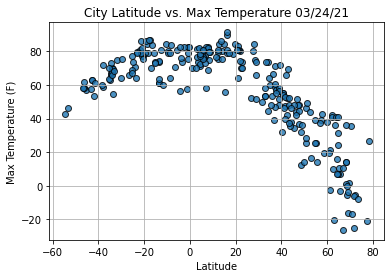

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

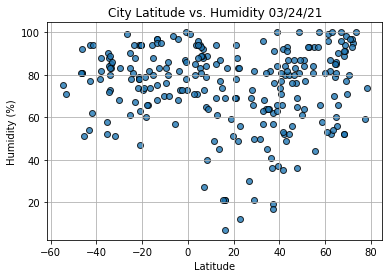

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

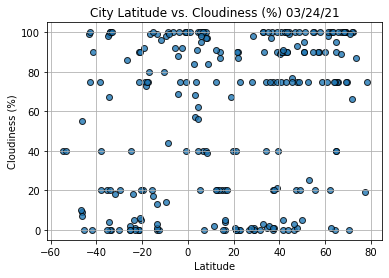

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

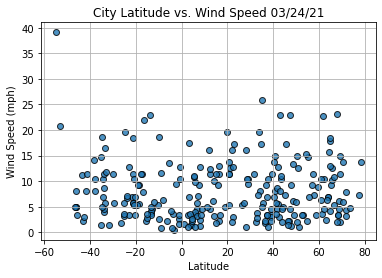

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()